# Project_1

### Temperature prediction problem using Linear_regression (gradient descent method)

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
 !pip install xlrd

In [3]:
pd.__version__

'1.2.4'

In [4]:
data= pd.read_csv('dataset.csv')

In [5]:
data.head()

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


In [6]:
type(data)


pandas.core.frame.DataFrame

In [7]:
x=np.array(data.X)
y=np.array(data.Y)

In [8]:
type(x)
type(y)

numpy.ndarray

In [9]:
def plot_points(x,y,xlabel,ylabel):
    plt.plot(x,y,'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

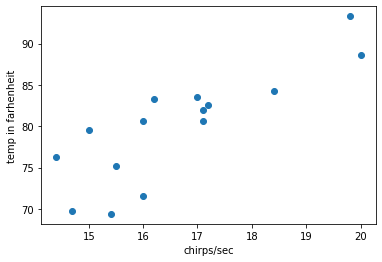

In [10]:
#Temp prediction
plot_points(x,y,"chirps/sec","temp in farhenheit") 

In [11]:
np.random.seed(2)
theta=np.random.rand(2,1)
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [12]:
#draw line
def draw_line(theta):
    axes=plt.gca()#get current axes
    xval=np.array(axes.get_xlim())
    yval=hypothesis(xval,theta)
    plt.plot(xval,yval,'--')

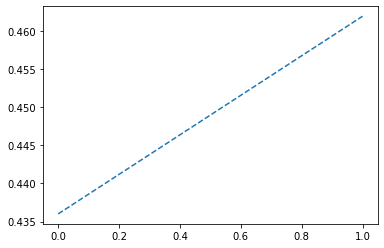

In [13]:
draw_line(theta)

In [14]:
#combining both functions
def draw_line_and_points(x,y,xlabel,ylabel,theta):
    plot_points(x,y,xlabel,ylabel)
    draw_line(theta)
    

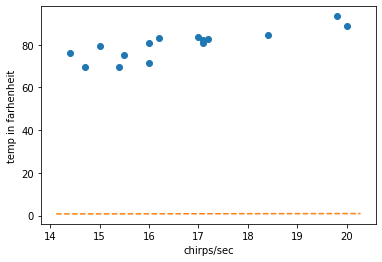

In [15]:
draw_line_and_points(x,y,"chirps/sec","temp in farhenheit",theta)

In [16]:
# getting cost j(theta0,theta1)
m=len(x)
def cost(x,y,theta):
    return (1/(2*m)*np.sum((hypothesis(x,theta)-y)**2))
   

In [17]:
cost(x,y,theta)

3154.8870744571304

In [18]:
#using gradient descent to reduce the minimization
def gradient_descent(x,y,theta,alpha,steps):
    for i in range(steps):
        old_cost=cost(x,y,theta)
        temp0=theta[0]-alpha*((1/m)*np.sum(hypothesis(x,theta)-y))
        temp1=theta[1]-alpha*((1/m)*np.dot((hypothesis(x,theta)-y),x))
        theta[0]=temp0
        theta[1]=temp1
        new_cost=cost(x,y,theta)
        if(new_cost>old_cost):
            print("warning!! cost increasing",new_cost)
        else:
            print("cost decreasing..",new_cost)

In [19]:
#alpha values can be determined by trail and error best case is between 0.001-0.005<1
gradient_descent(x,y,theta,alpha=0.001,steps=100)

cost decreasing.. 1635.2977297675818
cost decreasing.. 849.7898307803341
cost decreasing.. 443.74415710903946
cost decreasing.. 233.85053343835588
cost decreasing.. 125.35205308530111
cost decreasing.. 69.26686684984337
cost decreasing.. 40.275220900407845
cost decreasing.. 25.288798961439458
cost decreasing.. 17.541973528482107
cost decreasing.. 13.537448649531214
cost decreasing.. 11.467398078189143
cost decreasing.. 10.397318191652165
cost decreasing.. 9.84414430227494
cost decreasing.. 9.558170056057687
cost decreasing.. 9.410316957257288
cost decreasing.. 9.33386160137713
cost decreasing.. 9.294313249413898
cost decreasing.. 9.27384290888777
cost decreasing.. 9.26323439649766
cost decreasing.. 9.257723672170306
cost decreasing.. 9.254848102831042
cost decreasing.. 9.253334701358167
cost decreasing.. 9.252525433784397
cost decreasing.. 9.252080148434466
cost decreasing.. 9.251823013713082
cost decreasing.. 9.25166313854976
cost decreasing.. 9.251553539427785
cost decreasing.. 9.251

In [20]:
final_cost=cost(x,y,theta)

In [21]:
final_cost

9.247425317816075

In [22]:
theta

array([[0.74045512],
       [4.74763234]])

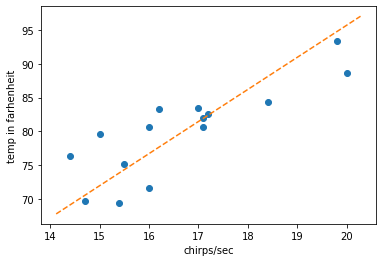

In [23]:
#final graph after fixing the cost 
draw_line_and_points(x,y,"chirps/sec","temp in farhenheit",theta)

In [24]:
#prediction
x=np.array([19.2])
hypothesis(x,theta)

array([91.89499602])

### Using sklearn method

In [25]:
# Import numpy,pandas,matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data= pd.read_csv('dataset.csv')
data.head()

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


In [27]:
#determining type
type(data)

pandas.core.frame.DataFrame

In [31]:
#pandas to array
x = np.array(data.X)
y = np.array(data.Y)

In [32]:
x,y

(array([20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
        15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
        15.        , 17.20000076, 16.        , 17.        , 14.39999962]),
 array([88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847,
        75.19999695, 69.69999695, 82.        , 69.40000153, 83.30000305,
        79.59999847, 82.59999847, 80.59999847, 83.5       , 76.30000305]))

In [35]:
def plot_points(x,y,xlabel,ylabel):
    plt.plot(x,y,'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

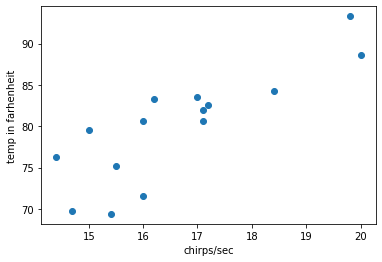

In [36]:
#Temp prediction
plot_points(x,y,"chirps/sec","temp in farhenheit") 

In [37]:
#importing linear regression from sklearn
from sklearn.linear_model import LinearRegression

In [45]:
x = x.reshape(-1,1) 

In [47]:
x

array([[20.        ],
       [16.        ],
       [19.79999924],
       [18.39999962],
       [17.10000038],
       [15.5       ],
       [14.69999981],
       [17.10000038],
       [15.39999962],
       [16.20000076],
       [15.        ],
       [17.20000076],
       [16.        ],
       [17.        ],
       [14.39999962]])

In [48]:
reg = LinearRegression().fit(x, y) #fitting values

In [49]:
#finding score
reg.score(x, y)

0.69746514501674

In [51]:
reg.coef_ #slope

array([3.29109457])

In [52]:
reg.intercept_#intercept

25.232304983426033

In [53]:
#draw_line
def draw_line(x, m, c):
    axes = plt.gca()
    x_vals = x
    y_vals = m * x + c
    plt.plot(x_vals, y_vals, '--')

In [54]:
#draw both
def draw_points_and_lines(x, y, xlabel, ylabel, m, c):
    plot_points(x, y, xlabel, ylabel)
    draw_line(x, m, c)

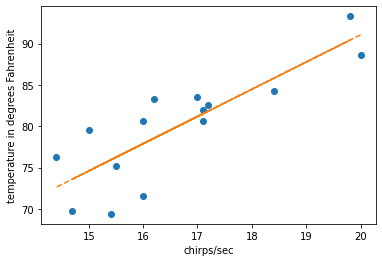

In [55]:
#draw line
draw_points_and_lines(X.flatten(), y, "chirps/sec","temperature in degrees Fahrenheit", reg.coef_,reg.intercept_)

In [57]:
#prediction of values
reg.predict([[20]])

array([91.05419634])

#### Save and load

In [58]:
import joblib

In [59]:
# save to pickle file/ binary file
joblib.dump(reg, 'Regg.pkl')

['Regg.pkl']

In [61]:
# load saved model
Regg2 = joblib.load('Regg.pkl')

In [63]:
Regg2 .predict([[20]])

array([91.05419634])

# Using iris dataset

In [64]:
# Import Standard Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import ML Libaries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import Dataset from sklearn 
from sklearn.datasets import load_iris

In [65]:
# Load Iris Data
iris = load_iris()

In [66]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [67]:
#data
iris_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)

In [68]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [71]:
target_data = pd.DataFrame(data= iris.target, columns= ['species'])

In [72]:
#convertor
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'

In [73]:
target_data['species'] = target_data['species'].apply(converter)

In [74]:
target_data

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [75]:
iris_data = pd.concat([iris_data, target_data], axis= 1)

In [76]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [78]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Predicting sepal length

In [80]:
iris_data.drop('species', axis= 1, inplace= True)

In [81]:
target_data = pd.DataFrame(columns= ['species'], data= iris.target)

In [83]:
iris_data = pd.concat([iris_data, target_data], axis= 1)

In [84]:
# Variables 
X= iris_data.drop(labels= 'sepal length (cm)', axis= 1)
y= iris_data['sepal length (cm)']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 121)

In [97]:
X_train.shape

(100, 4)

In [98]:
# LinearRegression() Model
lr = LinearRegression()

In [99]:
lr.fit(X_train, y_train)

LinearRegression()

In [100]:
lr.predict(X_test)

array([6.54408714, 6.62995732, 6.44603065, 4.90956185, 5.53046288,
       5.72034413, 5.58473175, 5.43982508, 5.62908078, 6.21234964,
       6.44814457, 5.4794949 , 6.31471027, 4.81938754, 4.96538324,
       6.73371792, 5.53999551, 4.83297382, 6.42455005, 5.41734385,
       6.26246693, 5.91106395, 6.1572422 , 4.96639601, 6.01233554,
       5.61190432, 4.88559225, 4.97788049, 7.75146   , 6.81459796,
       6.43564733, 7.19528743, 4.95179696, 4.99505695, 6.09571671,
       7.1888815 , 5.22340894, 5.39337425, 5.17079051, 6.62643131,
       6.01271063, 6.1383269 , 6.71551658, 5.24737854, 5.6305449 ,
       6.35161636, 6.86253717, 5.31678622, 6.18441478, 4.90276871])

In [101]:
pred = lr.predict(X_test)

In [104]:
# Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.258728323688662
Mean Squared Error: 0.10076371731874209
Mean Root Squared Error: 0.3174330123329048


### Test

In [105]:
iris_data.loc[5]

sepal length (cm)    5.4
sepal width (cm)     3.9
petal length (cm)    1.7
petal width (cm)     0.4
species              0.0
Name: 5, dtype: float64

In [106]:
d = {'sepal length (cm)' : [4.6],
    'sepal width (cm)' : [3.4],
    'petal length (cm)' : [1.4],
    'petal width (cm)' : [0.3],
    'species' : 0}

In [107]:
test_df = pd.DataFrame(data= d)

In [108]:
test_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,4.6,3.4,1.4,0.3,0


In [109]:
X_test = test_df.drop('sepal length (cm)', axis= 1)
y_test = test_df['sepal length (cm)']

In [110]:
lr.predict(X_test)

array([4.90956185])

In [111]:
pred = lr.predict(X_test)

In [112]:
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.6)

Predicted Sepal Length (cm): 4.9095618518739155
Actual Sepal Length (cm): 4.6


### Sepal length using linear regression model

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
data=pd.read_csv('Iris.csv')

In [123]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
type(data)

pandas.core.frame.DataFrame

In [125]:
X = np.array(data.SepalLengthCm)
y = np.array(data.SepalWidthCm)

In [126]:
X,y


(array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
      

In [127]:
# function for plotting data points
def plot_points(X, y, xlabel, ylabel):
    plt.plot(X, y, 'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

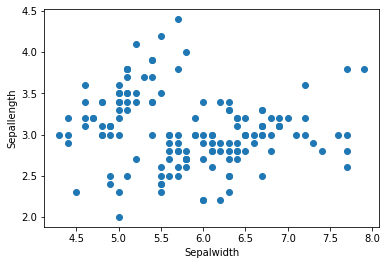

In [128]:
plot_points(X, y, "Sepalwidth", "Sepallength")

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
X = X.reshape(-1,1)

In [131]:
reg = LinearRegression().fit(X, y)

In [132]:
reg.score(X, y)

0.011961632834767588

In [133]:
reg.coef_

array([-0.05726823])

In [134]:
reg.intercept_

3.3886373794881

In [135]:
#line 
def draw_line(X, m, c):
    axes = plt.gca()
    x_vals = X
    y_vals = m * X + c
    plt.plot(x_vals, y_vals, '--')

In [136]:
# line and plot
def draw_points_and_lines(X, y, xlabel, ylabel, m, c):
    plot_points(X, y, xlabel, ylabel)
    draw_line(X, m, c)

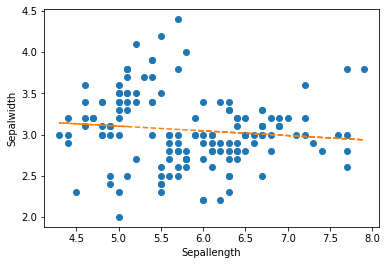

In [137]:
draw_points_and_lines(X.flatten(), y, "Sepallength", "Sepalwidth", reg.coef_, reg.intercept_)

In [138]:
reg.predict([[6.5]])

array([3.01639386])

## Save model

In [139]:
import joblib

In [140]:
joblib.dump(reg, 'iris.pkl')

['iris.pkl']

In [141]:
iris2 = joblib.load('iris.pkl')

In [142]:
iris2.predict([[6.5]])

array([3.01639386])